# Wrangle and Analyze Data

Following is the final project for "Wrangle & Analyze Data" section, pertaining to "Data Analyst" Udacity Nano-Degree.

## Table of Contents
1. Introduction
2. Gathering Data
3. Assessing Data
4. Cleaning Data
5. Analyzing and visualizing Data
6. Storing, Analyzing, and Visualizing Data
7. External Sources (if any)

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.
(Collected from "Project Overview" section)

## Gathering Data
We would use "twitter_archive_enhanced.csv" to access "WeRateDog" twitter archive. We would also use tweet image predictions to see the dog breed present at each tweet. Additionally we would see the retweet count and favourite ("like") count as well.

### Gathering Data from Twitter Archive

In [1]:
import numpy as np
import pandas as pd
import requests
#import creds
import json
import time
import tweepy
from functools import reduce

df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Gathering Tweet Image Predictions

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image_request.content)
df_twitter_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_twitter_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Gather the tweets' retweet count and like count

In [3]:
# Not including the keys in the submission, hence after running, replacing those with a star
auth = tweepy.OAuthHandler('*', '*')
auth.set_access_token('*', '*')
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

tweet_ids = df_twitter_archive.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

df_retweet_favourite = pd.read_json('tweet_json.txt')
df_retweet_favourite['tweet_id'] = tweet_success
df_retweet_favourite = df_retweet_favourite[['tweet_id', 'favorite_count', 'retweet_count']]
df_retweet_favourite.head(1)

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 729


,tweet_id,favorite_count,retweet_count
0,892420643555336193,36412,7745


In [7]:
df_retweet_favourite.to_csv('retweet_favourite.csv', index = False)

In [3]:
# This extra steps are performed in order for the long running process
# to avoid over and again
df_retweet_favourite = pd.read_csv('retweet_favourite.csv')
df_retweet_favourite.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36412,7745


## Assessing Data

Assessing data would assess the data quality and data tidyness issues.

### Assessing Data - Quality Issues

Normally this would comprise of the following, (1) Data Completeness (whether we have any missing data or not), (2) Data Validity (is the data valid ?/ does the data make sense ?), (3) Data Accuracy (is wrong data been shown as valid ?), (4) Data Consistency (standarization required ?)

### Twitter Archive - Quality Issues

In [4]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Twitter Archive - Completeness Issues
1. Please refer above analysis of the data frame. Twitter Archive data frame has missing data in the following columns: in_reply_to_status_id (78 not null, out of 2356), in_reply_to_user_id (78 not null, out of 2356), retweeted_status_id (181 not null, out of 2356), retweeted_status_user_id (181 not null, out of 2356), retweeted_status_timestamp (181 not null, out of 2356), expanded_urls (2297 not null, out of 2356).

2. tweet_id is an integer. It is too big to be an integer.

In [5]:
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Toby            7
Daisy           7
an              7
Buddy           7
Jack            6
Rusty           6
Oscar           6
Scout           6
Leo             6
Milo            6
Jax             6
Bella           6
Dave            6
Stanley         6
Koda            6
Larry           5
             ... 
Kevon           1
Sandra          1
Smiley          1
Mo              1
Halo            1
Chesterson      1
Ralphé          1
Harry           1
Spanky          1
Meatball        1
Maks            1
Moofasa         1
Tater           1
Timofy          1
Nimbus          1
Maisey          1
Link            1
Tiger           1
Lance           1
Millie          1
Keet            1
Dex             1
Luther          1
Corey           1
Odin      

#### Twitter Archive - Validity Issues
1. Please refer the above analysis, dog names have invalid data such as 'none', 'a' and 'an'.
2. The data frame contains columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. These are unnecessary columns for this data frame.  

In [14]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### Twitter Archive - Accuracy Issues

1. Please refer "df_twitter_archive.info()" as we did above. timestamp is an object there.
2. retweeted_status_timestamp is also an object (the other retweeted statuses, like retweeted_status_id, retweeted_status_user_id are floats).
3. The value for rating_numerator column, as we can see from the statement executed above, is going till 1776. This doesn't seem accurate.

In [15]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Twitter Archive - Consistency Issues

1. As we can see from the above statement execution, rating_denominator column is having values other than 10 as well. This is inconsistent.
2. source column still contains html tags. This is also inconsistent.

In [17]:
df_twitter_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [18]:
df_twitter_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
Samoyed                            20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [19]:
df_twitter_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

### Twitter Images - Validity Issues

1. As we can see from the above statement execution, "df_twitter_image_predictions" data frame's p1 column contains various invalid values, for example, 'seat_belt', 'envelope', 'radio_telescope', 'mailbox' etc.
2. Similarly, p2 also contains various invalid values such as 'purse', 'boathouse' etc.
3. Same applies for p3 column as well.

### Twitter Images - Consistency Issues

1. For "df_twitter_image_predictions" data frame, the cases for p1 or p2 or p3 column values are not consistent. Sometimes, those are starting with capital letter, sometimes they are all in lowercase letters. While sometimes, those are written in sentence case.
2. p1, p2 and p3 column values contain an underscore for multi-word dog breeds.

In [22]:
df_retweet_favourite[df_retweet_favourite.isnull()].shape[0]

2331

### ReTweet Favourite Collection - Completeness Issues

1. As we can see from above statement execution, the data frame contains missing data.

In [23]:
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [24]:
df_twitter_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [25]:
df_retweet_favourite.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Assessing Data - Tidiness Issues

As part of tidiness, in each of the data frames, (1) each variable should form a column, (2) each observation should form a row and (3) each type of observational unit should form a table.

As we can see, for three data frames above--
1. In 'df_twitter_archive' data frame, the last four columns ('doggo', 'floofer', 'pupper', 'puppo') relate to the same variable.
2. 'df_twitter_image_predictions' and 'df_retweet_favourite' look good, as each of them contains specific observational unit (image predictions and retweet/favourite tracking respectively), linked with tweet_id.

### Assessing Data - We have moved some of the internal steps performed here, to keep the notebook clean

In [4]:
# Tweet Ids are not duplicated at archive
df_twitter_archive[df_twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [5]:
# Tweet Ids are not duplicated at prediction set as well
df_twitter_image_predictions[df_twitter_image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [6]:
# Tweet Ids are not duplicated at retweet set as well
df_retweet_favourite[df_retweet_favourite.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count


In [7]:
# Average favourite count
df_retweet_favourite.favorite_count.mean()

7605.6752466752469

In [8]:
# Average Retweet count
df_retweet_favourite.retweet_count.mean()

2719.3376233376234

In [4]:
# Before we go to any further step, let's copy the data frames
archive_clean = df_twitter_archive.copy()
images_clean = df_twitter_image_predictions.copy()
twitter_counts_df_clean = df_retweet_favourite.copy()

## Cleaning Data

This section would contain (1) define, (2) code and (3) test as part of overall data wrangling process.

## Define

The steps could be as the following:
1. Merge the three (clean) data frames, that is archive_clean, images_clean and twitter_counts_df_clean
2. Create one column for the various dog types: doggo, floofer, pupper, puppo
3. Delete retweets
4. Remove unnecessary columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'img_num'
5. Change tweet_id from an integer to a string
6. Remove time zone from timestamp column and convert it to datetime
7. Maintain common casing for name
8. Standardize dog ratings
9. Creating a new column named dog_breed using the image prediction data

### Code and Test: Merge the three (clean) data frames, that is archive_clean, images_clean and twitter_counts_df_clean (Step 1)

In [5]:
dfs = [archive_clean, images_clean, twitter_counts_df_clean]
twitter_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs)
twitter_dogs.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,36412,7745


### Code and Test: Create one column for the various dog types: doggo, floofer, pupper, puppo (Step 2)

In [6]:
twitter_dogs['dog_type'] = twitter_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_dogs.dog_type.value_counts()

pupper     230
doggo       73
puppo       28
floofer      3
Name: dog_type, dtype: int64

### Code and Test: Delete retweets (Step 3)

In [7]:
twitter_dogs = twitter_dogs[np.isnan(twitter_dogs.retweeted_status_id)]
twitter_dogs = twitter_dogs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
doggo                    1987 non-null object
floofer                  1987 non-null object
pupper                   1987 non-null object
puppo                    1987 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1

### Code and Test: Remove columns no longer needed (Step 4)

In [8]:
twitter_dogs.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null b

### Code and Test: Change tweet_id from an integer to a string (Step 5)

In [9]:
twitter_dogs['tweet_id'] = twitter_dogs['tweet_id'].astype(str)
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null 

### Code and Test: Remove time zone from timestamp column and convert it to datetime (Step 6)

In [10]:
twitter_dogs['timestamp'] = twitter_dogs['timestamp'].str.slice(start=0, stop=-6)
twitter_dogs['timestamp'] = pd.to_datetime(twitter_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 n

### Code and Test: Maintain Common Casing For Name (Step 7)

In [11]:
twitter_dogs.name = twitter_dogs.name.str.replace('^[a-z]+', 'None')
twitter_dogs['name'].value_counts()

None        644
Oliver       10
Charlie      10
Cooper       10
Tucker        9
Lucy          9
Penny         9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
Bella         6
Jax           6
Koda          6
Stanley       6
Bo            6
Rusty         5
Leo           5
Bailey        5
Milo          5
Louis         5
Buddy         5
Dave          5
Chester       5
Oscar         5
Scout         5
Archie        4
Jerry         4
Phil          4
           ... 
Wiggles       1
Sundance      1
Harnold       1
Tom           1
Emmie         1
Vinnie        1
Lili          1
Kawhi         1
Akumi         1
Jazzy         1
Rizzy         1
Chesney       1
Jeffrie       1
Clifford      1
Koko          1
Rontu         1
Kanu          1
Beckham       1
Logan         1
Dixie         1
Taco          1
Nimbus        1
Rodney        1
Tuco          1
Bruiser       1
Yoda          1
Mattie        1
Travis        1
Mac           1
Meatball      1
Name: name, Length: 912,

### Code and Test: Standardize dog ratings ( Step 8)

In [12]:
import re

ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

twitter_dogs['rating_numerator'] = twitter_dogs['rating_numerator'].astype(float)
twitter_dogs['rating_denominator'] = twitter_dogs['rating_denominator'].astype(float)

# to gather all text, indices, and ratings for tweets which contain a decimal in the numerator of the rating
for i, text in twitter_dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# converting decimal ratings to float
twitter_dogs.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_dogs.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_dogs.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_dogs.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

# creating custom column rating, with standarized rating
twitter_dogs['rating'] = twitter_dogs['rating_numerator'] / twitter_dogs['rating_denominator']
twitter_dogs.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
25,886983233522544640,2017-07-17 16:17:36,This is Maya. She's very shy. Rarely leaves he...,https://twitter.com/dog_rates/status/886983233...,13.0,10.0,Maya,None,None,None,...,toy_terrier,0.143528,True,can_opener,0.032253,False,32965,7041,NaN,1.3
1684,672995267319328768,2015-12-05 04:25:50,This is Pumpkin. He can look in two different ...,https://twitter.com/dog_rates/status/672995267...,8.0,10.0,Pumpkin,None,None,None,...,boxer,0.166927,True,Boston_bull,0.101354,True,923,279,NaN,0.8


In [13]:
twitter_dogs.rating.describe()

count    1987.000000
mean        1.164651
std         4.071452
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

### Code and Test: Creating a new column named dog_breed using the image prediction data (Step 9)

In [14]:
twitter_dogs['dog_breed'] = 'None'

for i, r in twitter_dogs.iterrows():

    if r.p1_dog:
        twitter_dogs.set_value(i, 'dog_breed', r.p1)
    elif r.p2_dog and r.rating_numerator >= 10:
        twitter_dogs.set_value(i, 'dog_breed', r.p2)
    elif r.p3_dog and r.rating_numerator >= 10:
        twitter_dogs.set_value(i, 'dog_breed', r.p3)
    else:
        twitter_dogs.set_value(i, 'dog_breed', 'None')

twitter_dogs.dog_breed.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


None                          365
golden_retriever              156
Labrador_retriever            105
Pembroke                       94
Chihuahua                      85
pug                            60
toy_poodle                     48
chow                           46
Samoyed                        41
Pomeranian                     40
malamute                       33
cocker_spaniel                 30
French_bulldog                 29
Chesapeake_Bay_retriever       29
miniature_pinscher             23
German_shepherd                21
Staffordshire_bullterrier      20
Siberian_husky                 20
Eskimo_dog                     20
Maltese_dog                    19
Cardigan                       19
Shetland_sheepdog              19
beagle                         19
Rottweiler                     18
Shih-Tzu                       18
Italian_greyhound              17
kuvasz                         17
Lakeland_terrier               16
basset                         16
Old_English_sh

### Few Addition Steps for next tasks

In [15]:
twitter_dogs.to_csv('final_twitter_archive_master.csv', encoding='utf-8', index=False)

In [16]:
twitter_dogs = pd.read_csv('final_twitter_archive_master.csv')
twitter_dogs.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,0.085851,False,banana,0.076110,False,36412,7745,NaN,1.3,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,0.090647,True,papillon,0.068957,True,31362,5735,NaN,1.3,Chihuahua


In [17]:
# Calculating monthly tweets
twitter_dogs.timestamp = pd.to_datetime(twitter_dogs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
monthly_tweets = twitter_dogs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

## Storing, Analyzing, and Visualizing Data

In [18]:
# declarations
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Visualizing Data - Tweets vs Time

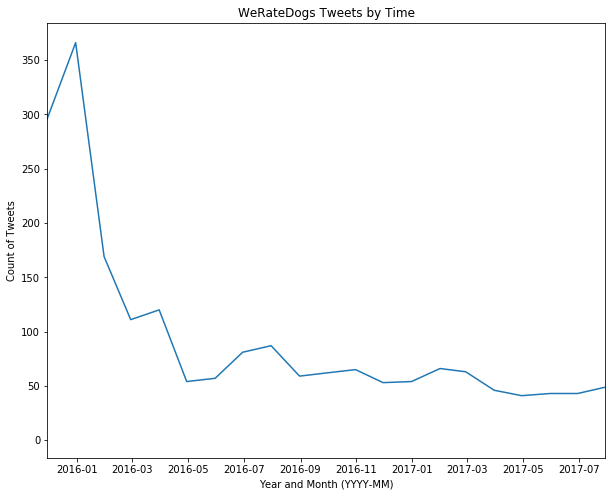

In [19]:
# Let's see how tweets performed over time
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month (YYYY-MM)')
plt.ylabel('Count of Tweets')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets by Time');

As we were analyzing data from Jan 2016, we can see that, with time tweets decreased sharply, with little spikes in activity during the early spring of 2016, mid-summer of 2016, and then quite decreasing from there.

### Visualizing Data - Favorite Count vs Retweet Count

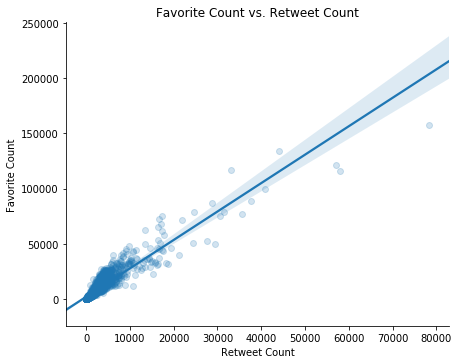

In [20]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_dogs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

In the above graph, its clearly seen that, the favorites & retweets are positively co-related. That's natural though. Obviously those posts are favoutite to the users, that's why they re-tweet.

### Visualizing Data - Most Popular Dog Names

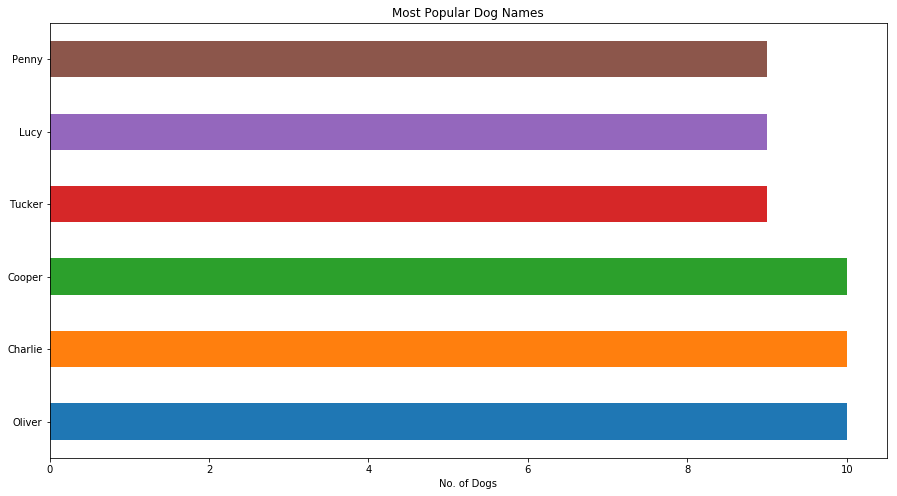

In [22]:
# Purposefully used 1:7, in order to avoid None
twitter_dogs.name.value_counts()[1:7].plot('barh', figsize=(15,8), title='Most Popular Dog Names').set_xlabel("No. of Dogs");

The three most popular dog names are Oliver, Charlie, and Cooper, for a tie at 10 each.

### Visualizing Data - Most Popular Dog Breeds

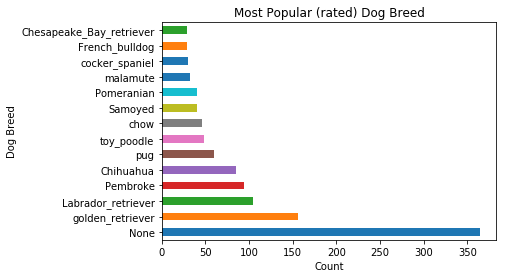

In [23]:
dog_breed = twitter_dogs.groupby('dog_breed').filter(lambda x: len(x) >= 25)
dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Popular (rated) Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed');

The most popular dog breed is a golden retriever (ignoring the None label), with a labrador retriever coming in as the second most popular breed. Pembroke isn't far behind either.

## External Sources

https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python?answertab=oldest#tab-top
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
https://tweepy.readthedocs.io/en/v3.2.0/api.html#API.get_status
https://thepythonguru.com/python-builtin-functions/reduce/
https://docs.python.org/3/library/datetime.html
https://ipython.org/ipython-doc/3/api/generated/IPython.display.html